In [36]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense

In [5]:
wheat = yf.download("ZW=F", start="2010-01-01", end="2022-01-01")
wheat

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,557.75,41278
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,553.00,36720
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,567.25,38503
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,557.75,33873
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,568.50,33873
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,804.00,30210
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,783.50,41877
2021-12-29 00:00:00-05:00,785.25,793.00,774.00,787.75,787.75,40941


In [7]:
wheat.shape

(3019, 6)

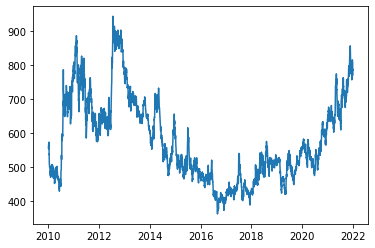

In [9]:
plt.plot(wheat["Close"])

In [12]:
data = wheat.filter(["Close"])
dataset = data.values

In [13]:
trainin_len = math.ceil( len(dataset) * .8)
trainin_len

2416

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.33791327],
       [0.32975526],
       [0.35422928],
       ...,
       [0.73293259],
       [0.71919279],
       [0.70373551]])

In [18]:
train_data = scaled_data[0:trainin_len, :]

In [19]:
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [26]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2316, 100, 1)

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2316/2316 [==============================] - 160s 65ms/step - loss: 0.0024


In [40]:
test_data = scaled_data[trainin_len - 100: , :]
x_test = []
y_test = dataset[trainin_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

In [41]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 4s 132ms/step


In [44]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.8845906170644176

#### It's close to 0, so it's not a bad value.

<ipython-input-51-924517371bd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

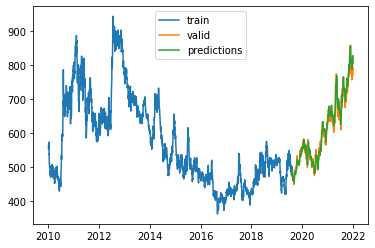

In [51]:
train = data[:trainin_len]
valid = data[trainin_len:]
valid['Predictions'] = predictions
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','valid','predictions'])
plt.show

In [49]:
valid

,Close,Predictions
Date,,
2019-08-13 00:00:00-04:00,472.00,488.357605
2019-08-14 00:00:00-04:00,473.75,482.459839
2019-08-15 00:00:00-04:00,469.00,477.559326
2019-08-16 00:00:00-04:00,470.75,473.047577
2019-08-19 00:00:00-04:00,465.50,470.186554
...,...,...
2021-12-27 00:00:00-05:00,804.00,823.698242
2021-12-28 00:00:00-05:00,783.50,827.250305
2021-12-29 00:00:00-05:00,787.75,820.547302
